**Work was done by:** 

**Data was collected on:**

# Install and Import Libraries

In [149]:
!pip install whit-phys-util 1>/dev/null

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
from scipy.optimize import curve_fit
from numpy import exp, cos, pi, sqrt

# Connect to GitHub

In [151]:
repo = buc.local_repository("https://github.com/PS353-SP22/damped-torsional-oscillations-group-2-lc-jz")

Repository exists at this location. Pulling changes from GitHub.


# Equipment

| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| torsional oscillator | TeachSpin | | |
| digital multimeter | | | |
| oscilloscope | | | |

# Linear Drag

In [152]:
linearDataFileNames = ["SDS00002.CSV", # number 1 and 2 are both from first trial 
                       "SDS00003.CSV",
                       "SDS00004.CSV",
                       "SDS00005.CSV",
                       "SDS00006.CSV",
                       "SDS00007.CSV"
                       ]

## Analysis of Sample Set

In [153]:
repo.pull() # pull in CSV files

In [154]:
df1 = pd.read_csv(linearDataFileNames[0], skiprows=5628, usecols=[3,4], header=
None, names=['Time (s)', 'Voltage (V)'])
df1.head()
# start data at row 5629, since the trigger was set at the wrong place (at origin rather than at the left side of the screen)

,Time (s),Voltage (V)
0,0.0008,1.00
1,0.0016,0.98
2,0.0024,0.98
3,0.0032,0.98
4,0.0040,0.98


In [155]:
def osc(t, A, beta, wd, phi, v0): # for best fit 
  return A*exp(-beta*t)*cos(wd*t-phi) + v0

### Fitting parameters 
Our guesses for the fitting parameters are as follows:
* stuff
* other stuff

In [156]:
param, cov = curve_fit(osc, df1['Time (s)'], df1['Voltage (V)'], p0 = 
[1.0, 0.1, 6, 0.001, 0.01]) # guesses for parameters 

In [157]:
fitTable = buc.fitTable(param, cov, paramLabels=['A', 'beta','wd', 'phi', 'v0'])
fitTable

,A,beta,wd,phi,v0
value,1.706137,0.487298,5.311231,-0.955669,0.029989
uncertainty,0.003539,0.001500,0.001339,0.001696,0.000727


In [158]:
df1['Best fit'] = osc(df1['Time (s)'], *param)
df1['Residual'] = df1['Voltage (V)'] - df1['Best fit']

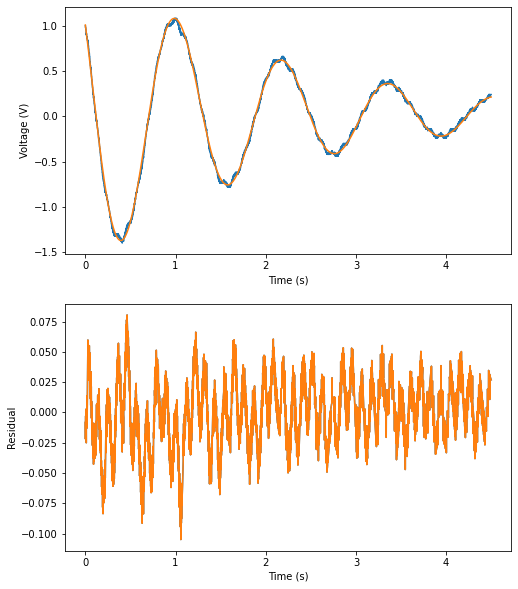

In [159]:
fig1, ax1 = plt.subplots(2, figsize=(8,10)) # define two plots 

# Voltage data 
ax1[0].plot(df1['Time (s)'], df1['Voltage (V)'])
ax1[0].set_xlabel("Time (s)");
ax1[0].set_ylabel("Voltage (V)");
ax1[0].plot(df1['Time (s)'], df1['Best fit'])

# Residual data
ax1[1].plot(df1['Time (s)'], df1['Residual'])
ax1[1].set_xlabel("Time (s)");
ax1[1].set_ylabel("Residual");
ax1[1].plot(df1['Time (s)'], df1['Residual']);

In [160]:
w0 = sqrt(fitTable['beta']['value']**2 + fitTable['wd']['value']**2)
w0

5.3335382254502495

In [161]:
f0 = w0/(2*pi)
f0

0.8488589727499829

## Analysis of All Sets

In [162]:
dfLinear = []
for fileName in linearDataFileNames:
  df = pd.read_csv(fileName,skiprows=5628,usecols=[3,4],header=None,names=['Time (s)', 'Voltage (V)'])
  dfLinear.append(df)

In [163]:
fitTables = []
for df in dfLinear:
  param, cov = curve_fit(osc, df['Time (s)'], df['Voltage (V)'], p0 = [1.0, 0.1, 6, 0.001, 0.01])
  fitTable = buc.fitTable(param, cov, paramLabels=['A', 'beta','wd', 'phi', 'v0'])
  df['Best fit'] = osc(df['Time (s)'], *param)
  df['Residual'] = df['Voltage (V)'] - df['Best fit']
  fitTables.append(fitTable)
fitTables

[                    A      beta        wd       phi        v0
 value        1.706137  0.487298  5.311231 -0.955669  0.029989
 uncertainty  0.003539  0.001500  0.001339  0.001696  0.000727,
                     A      beta        wd       phi        v0
 value        1.499433  0.905970  5.252777 -0.857137  0.037238
 uncertainty  0.003117  0.002419  0.002069  0.001492  0.000453,
                     A      beta        wd       phi        v0
 value        1.365435  1.552174  5.083876 -0.781245  0.038380
 uncertainty  0.003985  0.005249  0.004452  0.001848  0.000385,
                     A      beta        wd       phi        v0
 value        1.228359  2.469484  4.693393 -0.698939  0.043104
 uncertainty  0.004627  0.008739  0.009308  0.002685  0.000280,
                     A      beta        wd       phi        v0
 value        0.962584  3.693066  3.847682 -0.231530  0.043489
 uncertainty  0.005725  0.019695  0.043272  0.014369  0.000307,
                     A      beta        wd       p

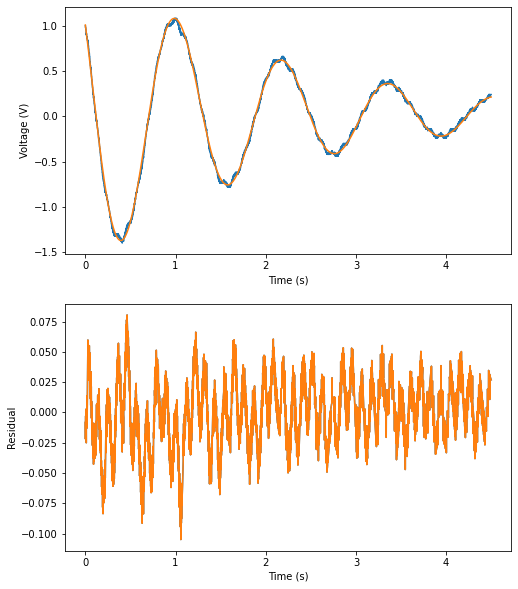

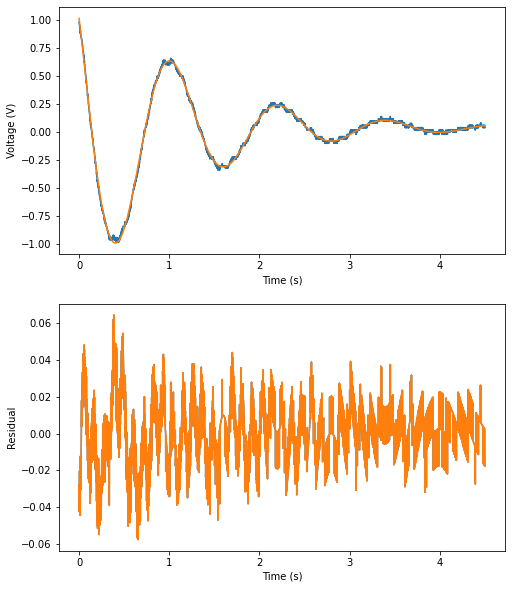

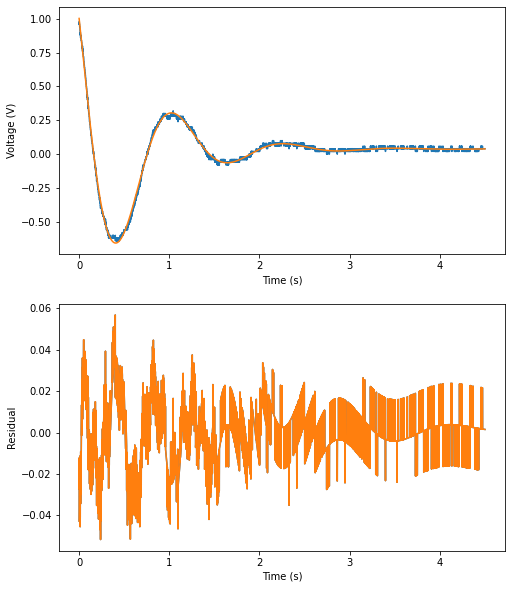

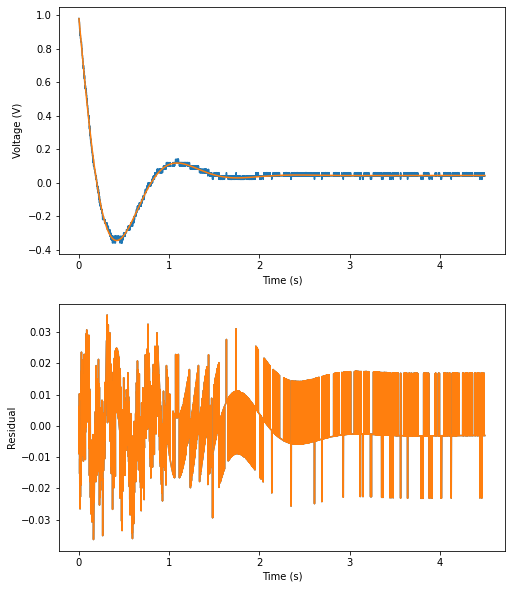

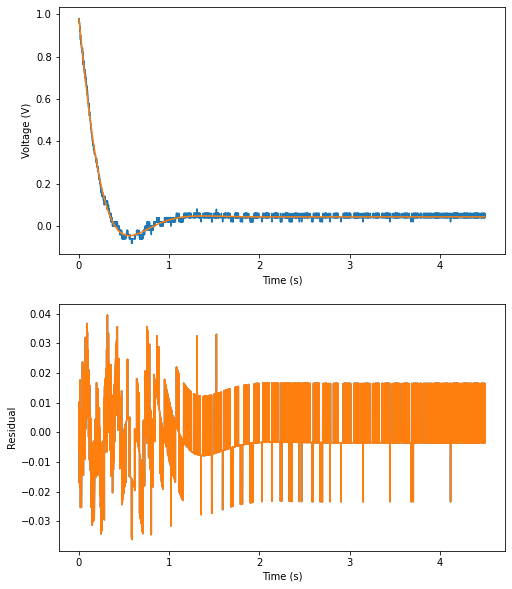

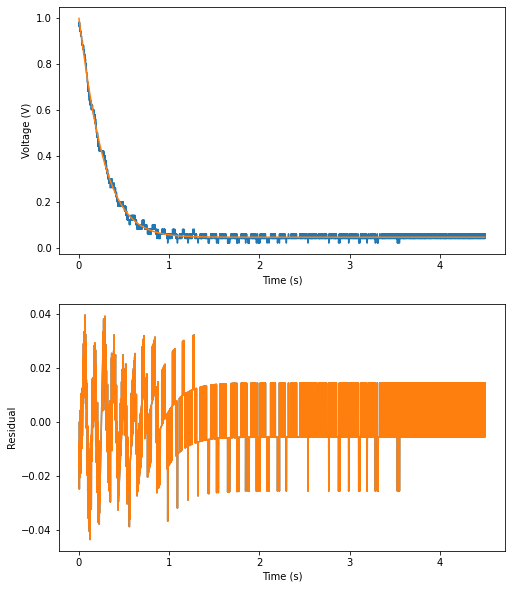

In [164]:
figs = []
for df in dfLinear:
  fig, ax = plt.subplots(2, figsize=(8,10));
  # Voltage data 
  ax[0].plot(df['Time (s)'], df['Voltage (V)'])
  ax[0].set_xlabel("Time (s)");
  ax[0].set_ylabel("Voltage (V)");
  ax[0].plot(df['Time (s)'], df['Best fit'])

  # Residual data
  ax[1].plot(df['Time (s)'], df['Residual'])
  ax[1].set_xlabel("Time (s)");
  ax[1].set_ylabel("Residual");
  ax[1].plot(df['Time (s)'], df['Residual']);
  figs.append(fig);

In [165]:
f0_list = [] # create empty list for storing f0 values 
for table in fitTables:
  wnot = sqrt(table['beta']['value']**2 + table['wd']['value']**2)
  fnot = wnot/(2*pi)
  f0_list.append(fnot)

In [166]:
print(f0_list)

[0.8488589727499829, 0.848348899341686, 0.8459956187564203, 0.8440658027467394, 0.8488106760773246, 0.8777142131502875]


In [167]:
df_f0 = pd.DataFrame(f0_list[:-1], columns=['f0'])
print(f"f0 = {df_f0['f0'].mean(): .4f} +/- {df_f0['f0'].sem(): .4f}")

f0 =  0.8472 +/-  0.0009


### Comparison of damped f0 and undamped 
pretty darn close

## Reflection

# Quadratic Drag

In [168]:
quadDataFileNames = ["SDS00009.CSV", # number  9 is horizontal and number 10 is vertical 
                       "SDS00010.CSV"
                    ]

In [169]:
dfQuad = []
for fileName in quadDataFileNames:
  df = pd.read_csv(fileName,skiprows=10,usecols=[3,4],header=None,names=['Time (s)', 'Voltage (V)'])
  dfQuad.append(df)

In [170]:
fits = []
for df in dfQuad:
  param, cov = curve_fit(osc, df['Time (s)'], df['Voltage (V)'], p0 = [1.0, 0.1, 6, 0.001, 0.01])
  fitTable = buc.fitTable(param, cov, paramLabels=['A', 'beta','wd', 'phi', 'v0'])
  df['Best fit'] = osc(df['Time (s)'], *param)
  df['Residual'] = df['Voltage (V)'] - df['Best fit']
  fits.append(fitTable)
fits

[                    A      beta        wd       phi        v0
 value        1.004130  0.029923  2.700123 -1.500003 -0.092763
 uncertainty  0.000865  0.000096  0.000095  0.000853  0.000268,
                     A      beta        wd       phi        v0
 value        0.816651  0.213250  2.540825 -1.451343 -0.097111
 uncertainty  0.003314  0.001206  0.001161  0.003815  0.000568]

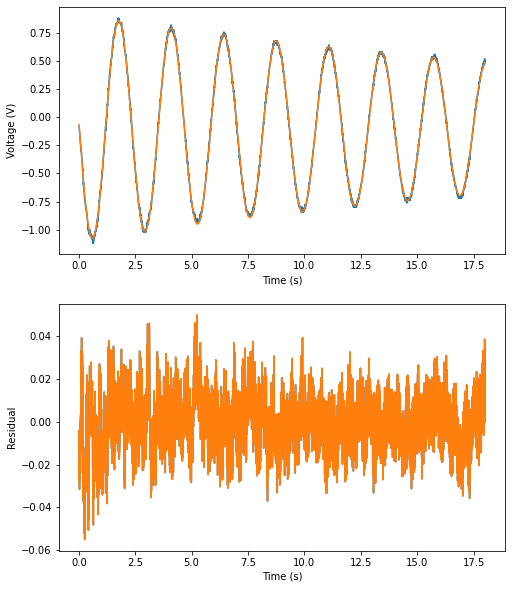

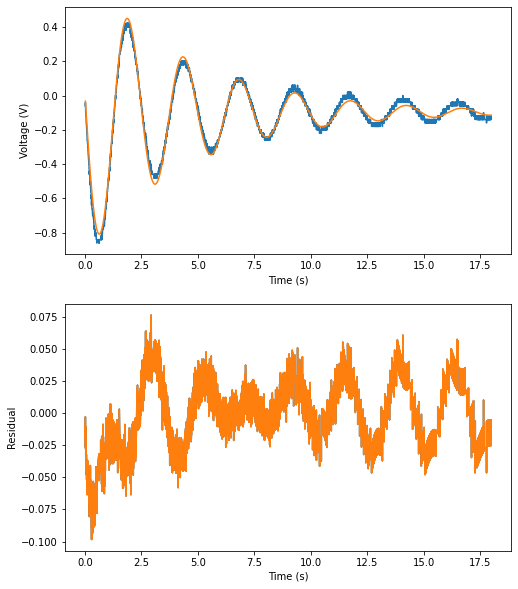

In [193]:
quadFigs = []
labels = ['Horizontal', 'Vertical']
for df in dfQuad:
  fig, ax = plt.subplots(2, figsize=(8,10));
  # Voltage data 
  ax[0].plot(df['Time (s)'], df['Voltage (V)']);
  ax[0].set_xlabel("Time (s)");
  ax[0].set_ylabel("Voltage (V)");
  ax[0].plot(df['Time (s)'], df['Best fit']);

  # Residual data
  ax[1].plot(df['Time (s)'], df['Residual']);
  ax[1].set_xlabel("Time (s)");
  ax[1].set_ylabel("Residual");
  ax[1].plot(df['Time (s)'], df['Residual']);
  quadFigs.append(fig);

In [172]:
f0_list_quad = [] # create empty list for storing f0 values 
for table in fits:
  wnot = sqrt(table['beta']['value']**2 + table['wd']['value']**2)
  fnot = wnot/(2*pi)
  f0_list_quad.append(fnot)

In [173]:
print(f0_list_quad)

[0.4297643223062714, 0.40580659192082635]


# Summary and Conclusion